# Triple Exponential Smoothing (TES)

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load datasets

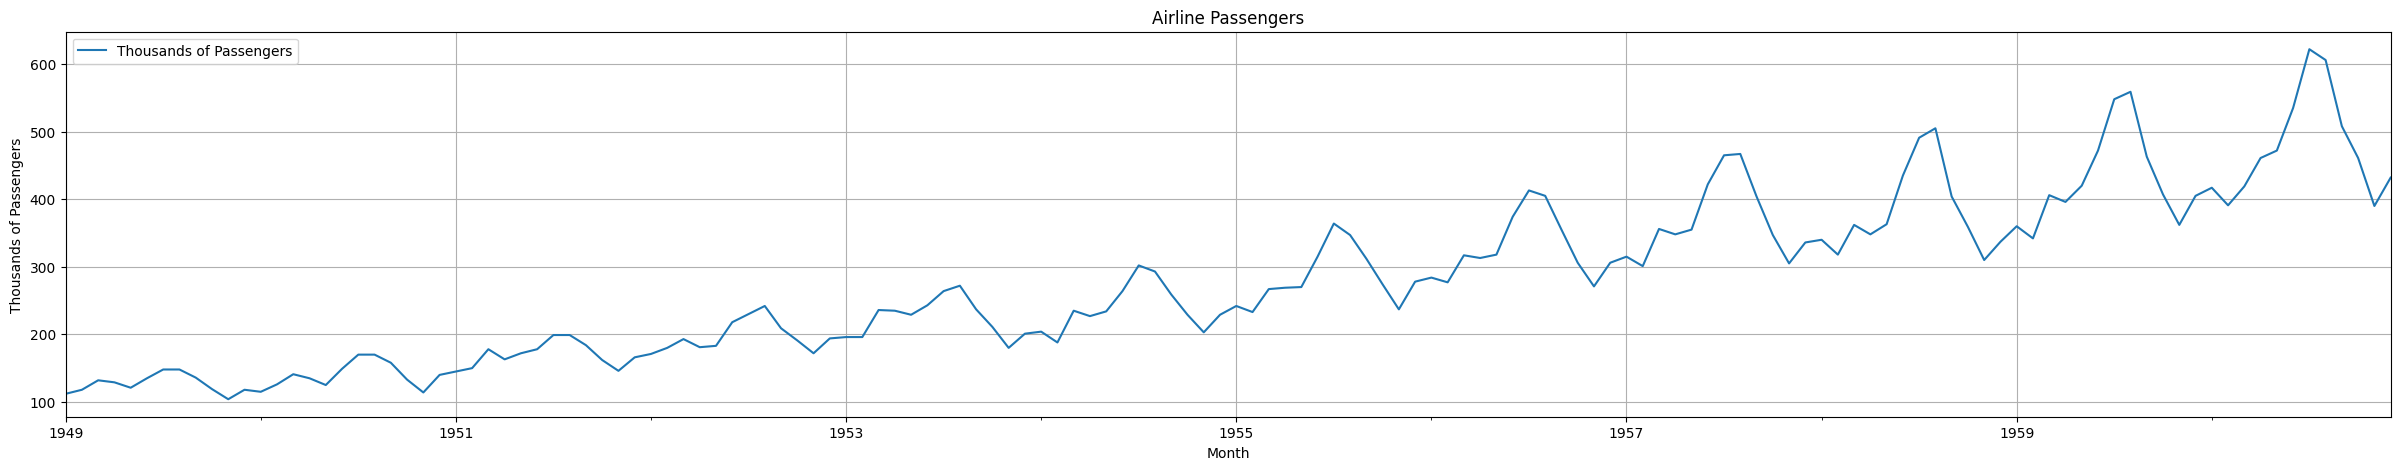

In [ ]:
# Load dataset

ts = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/airline_passengers.csv',
                      index_col = 'Month', parse_dates = True)

ts.plot(figsize = (30,5), grid = True, ylabel = 'Thousands of Passengers', title = 'Airline Passengers')
plt.show()

### Forecasting Using SES

#### 1. Select a Model

In [ ]:
# We will use Double Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### 2. Split data into train & test sets

In [ ]:
# Splitting

forecast_horizon = 36 # or periods

train_data = ts.iloc[:-forecast_horizon] # data except the last 12 months
test_data = ts.iloc[-forecast_horizon:] # select the last 12 months

train_data = train_data.asfreq('MS')
test_data = test_data.asfreq('MS')

#### 3. Fit model on training set

In [ ]:
tes_model = ExponentialSmoothing(train_data, trend = 'additive', seasonal = 'multiplicative', seasonal_periods = 12).fit()

# tes_model.summary()

#### 4. Evaluate model on test set (visually first)

In [ ]:
# Forecast/Predict based on train_data

tes_pred = tes_model.forecast(forecast_horizon)
tes_pred

,0
1958-01-01,345.593736
1958-02-01,337.453466
1958-03-01,391.270831
1958-04-01,380.630372
1958-05-01,382.065456
1958-06-01,438.507820
1958-07-01,486.134301
1958-08-01,480.818450
1958-09-01,422.394591
1958-10-01,367.220563


Text(0.5, 0, 'Date')

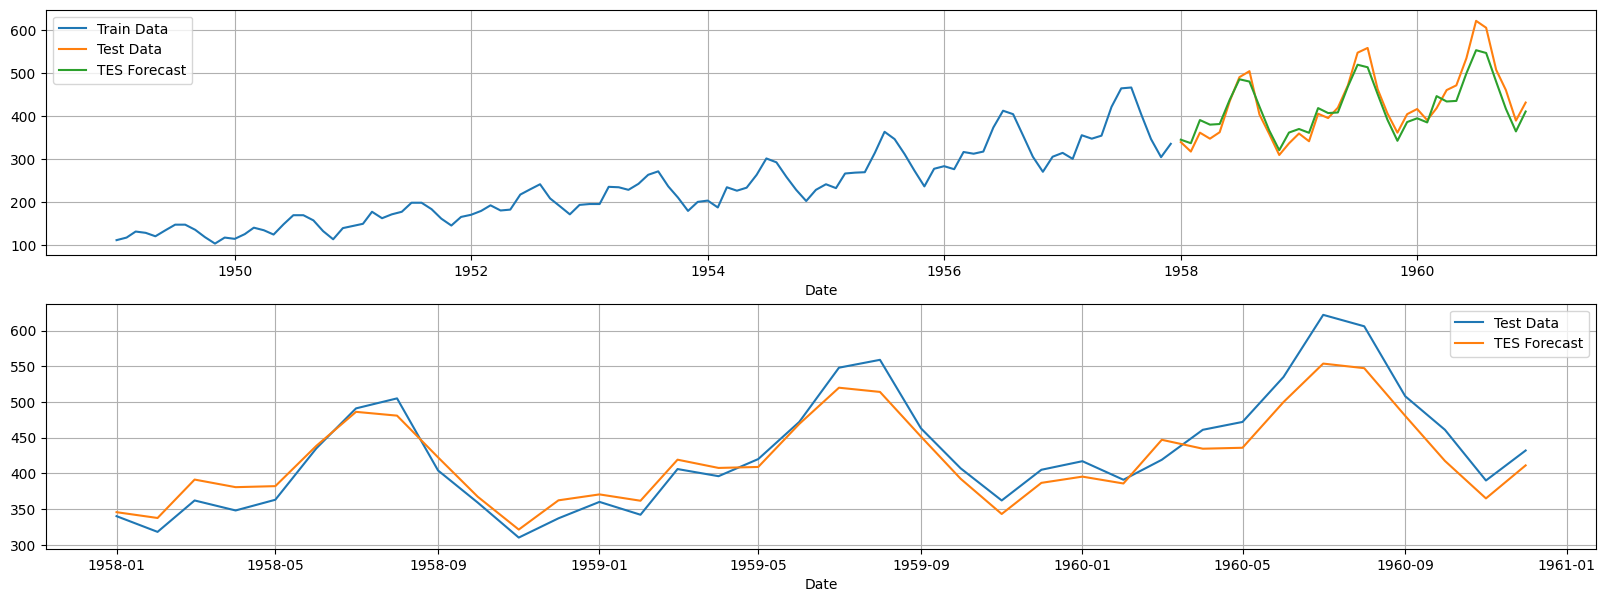

In [ ]:
# Visualization

plt.figure(figsize = (20, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data, label = 'Train Data')
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(tes_pred.index, tes_pred, label = 'TES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(tes_pred.index, tes_pred, label = 'TES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

#### 5. Re-fit model on entire data set

In [ ]:
# Notice we are using the entire dataset

ts = ts.asfreq('MS')

tes_model = ExponentialSmoothing(ts, trend = 'additive', seasonal = 'multiplicative', seasonal_periods = 12).fit()

6. Forecast for future data

In [ ]:
# We forecast using the entire dataset

tes_pred = tes_model.forecast(forecast_horizon)
tes_pred

,0
1961-01-01,445.242361
1961-02-01,418.225341
1961-03-01,465.309832
1961-04-01,494.951245
1961-05-01,505.475873
1961-06-01,573.312666
1961-07-01,663.596376
1961-08-01,654.904046
1961-09-01,546.760994
1961-10-01,488.446831


Text(0.5, 0, 'Date')

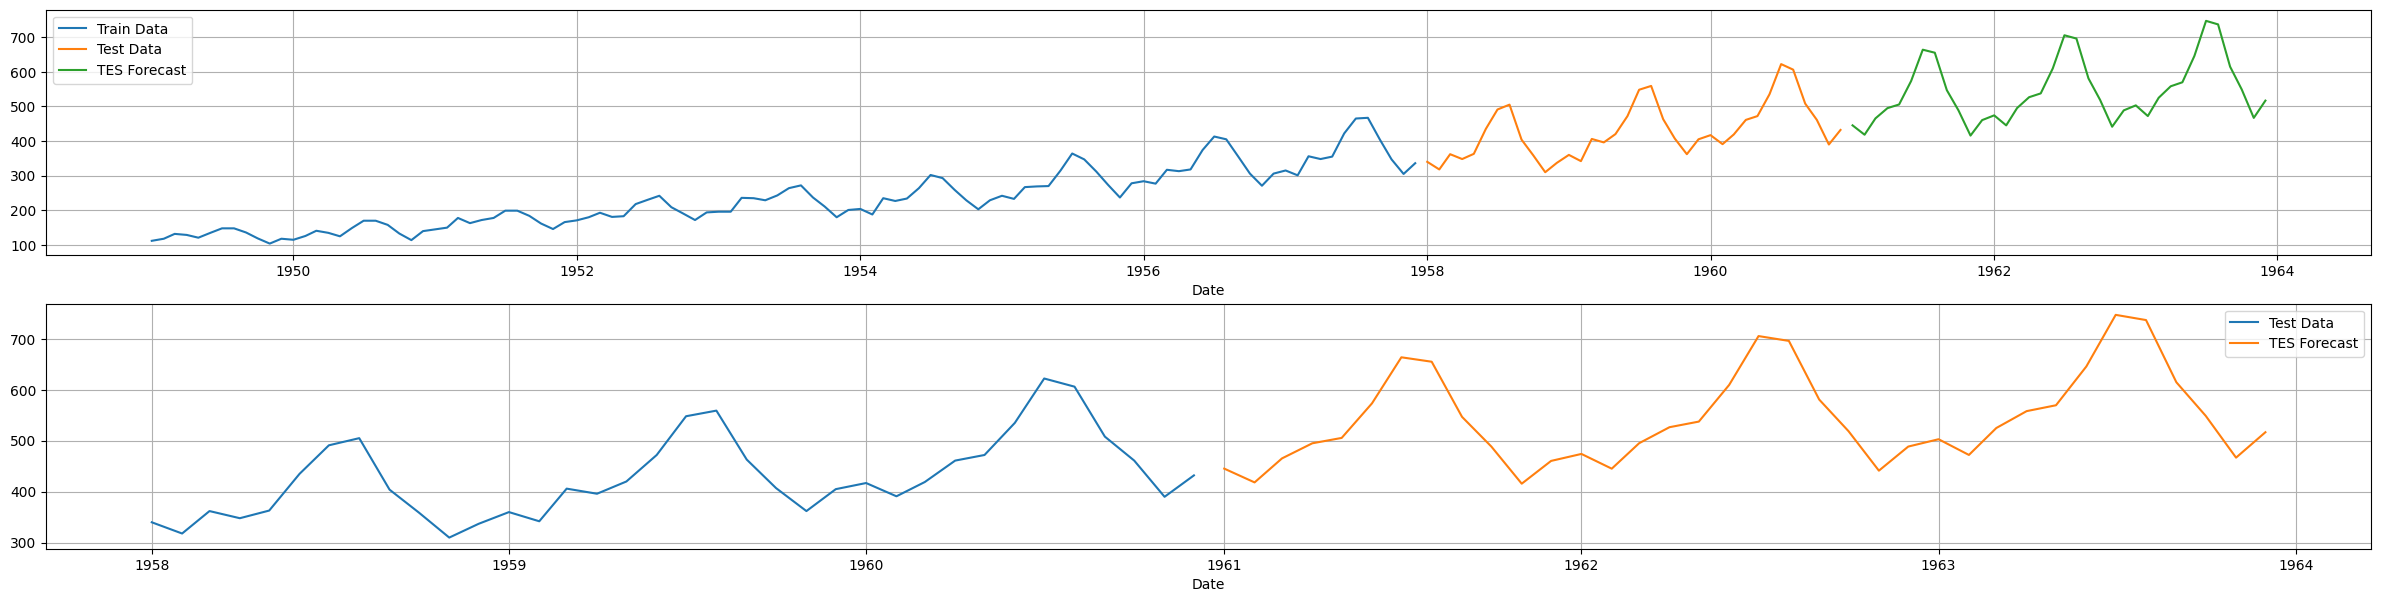

In [ ]:
# Visualization

plt.figure(figsize = (30, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data, label = 'Train Data')
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(tes_pred.index, tes_pred, label = 'TES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data, label = 'Test Data')
plt.plot(tes_pred.index, tes_pred, label = 'TES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

In [ ]:
# Why the forecast is good? It accounts for trend and seasonality